**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform topic modeling to extract important topics and words from textual data..**



**Guidelines**
* Download `abcnews-date-text.csv` file from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file named `Lab4.ipynb` and submit to D2L `Lab 4 – Topic Modeling (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

### Question 1: Read the content of the `abcnews-date-text.csv` and perform the following:
<hr style="border:1px solid orange"> </hr>

> **Q1.1.** Preprocess the `headline_text` field content by performing the necessary steps to make it ready for applying topic modeling algorithms. Store the resulted preprocessed text into a list called `headlines`

> **Q1.2.** Using `Explicit Symantic Analysis` algorithm, find and print the top `20` related documents to the following document: 
>>   \['price', 'sugar', 'sweet'\]. 

> **Q1.3.** Using only the first `50` headlines, perform a document clustering using `AgglomerativeClustering` algorithm and plot the resulted dendrogram.

> **Q1.4.** Using `Latent Dirichlett Allocation` algorithm, perform topic modeling to find `20` topics from the headlines. Then, print the top `10` words for each topic. 

> **Q1.5.** Using `Non-Negative Matrix Factorization` algorithm, perform topic modeling to find `20` topics from the headlines. Then, print the top `10` words for each topic. 

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
stop_words = stopwords.words('english')

import warnings

# Suppress the specific deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
import string 
from collections import Counter 
from pprint import pprint 
import gzip

import matplotlib 
import matplotlib.pyplot as plt

import nltk 
from nltk.text import TextCollection

import numpy as np 
from numpy.linalg import svd 
from numpy import diag

import sklearn 
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.decomposition import NMF 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram 
from sklearn.decomposition import LatentDirichletAllocation

import watermark

%load_ext watermark
%matplotlib inline

### Q1.1. Preprocess the headline_text field content by performing the necessary steps to make it ready for applying topic modeling algorithms. Store the resulted preprocessed text into a list called headlines

In [8]:

headline_import = pd.read_csv("abcnews-date-text.csv")

### Preprocessing

In [10]:
headline_import.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [11]:
# Preprocess function definition
def preprocess(documents):
    processed_docs = []
    for doc in documents:
        tokens = doc.lower().split()  # Tokenize and lowercase
        filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]  # Filter stop words and non-alphabetic tokens
        processed_docs.append(" ".join(filtered_tokens))  # Join the tokens back into a string
    return processed_docs

In [12]:
# Passing the 'headline_text' column as a list to the preprocess function
headlines = preprocess(headline_import["headline_text"].tolist())

In [13]:
headlines

['aba decides community broadcasting licence',
 'act fire witnesses must aware defamation',
 'g calls infrastructure protection summit',
 'air nz staff aust strike pay rise',
 'air nz strike affect australian travellers',
 'ambitious olsson wins triple jump',
 'antic delighted record breaking barca',
 'aussie qualifier stosur wastes four memphis match',
 'aust addresses un security council iraq',
 'australia locked war timetable opp',
 'australia contribute million aid iraq',
 'barca take record robson celebrates birthday',
 'bathhouse plans move ahead',
 'big hopes launceston cycling championship',
 'big plan boost paroo water supplies',
 'blizzard buries united states bills',
 'brigadier dismisses reports troops harassed',
 'british combat troops arriving daily kuwait',
 'bryant leads lakers double overtime win',
 'bushfire victims urged see centrelink',
 'businesses prepare terrorist attacks',
 'calleri avenges final defeat eliminate massu',
 'call ethanol blend fuel go ahead',
 'ca

#### Q1.2. Using Explicit Symantic Analysis algorithm, find and print the top 20 related documents to the following document:
#### ['price', 'sugar', 'sweet'].

In [15]:
# Defining the query document that we were given
query = ['price', 'sugar', 'sweet']
query_str = " ".join(query)  # Convert the query list into a string

# Creating a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

In [16]:
# Fitting the vectorizer on the document corpus (your headlines)
tfidf_matrix = vectorizer.fit_transform(headlines)

# Transforming the query into the same vector space
query_vec = vectorizer.transform([query_str])

# Computing cosine similarity between the query and all documents
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# Now we get the top 20 most similar documents based on cosine similarity
top_20_indices = cosine_similarities.argsort()[-20:][::-1]

In [17]:
# Printing the top 20 related documents
print("Top 20 related documents to the query 'price, sugar, sweet':")
for index in top_20_indices:
    print(f"Document {index + 1}: {headlines[index]} (Similarity: {cosine_similarities[index]})")

Top 20 related documents to the query 'price, sugar, sweet':
Document 754948: sugar price forecast sweet (Similarity: 0.8603767515469731)
Document 686636: sugar price bitter sweet (Similarity: 0.8103223421087405)
Document 983661: sweet deal sugar (Similarity: 0.7811391020101723)
Document 56250: sugar outlook sweet (Similarity: 0.7230285517190078)
Document 636652: china sweet aussie sugar (Similarity: 0.7016287154735855)
Document 471019: sugar sweet says researcher (Similarity: 0.6689718434101979)
Document 980526: lewis sweet sugar hit (Similarity: 0.6632717535318905)
Document 482828: sweet times sugar communities (Similarity: 0.6506695362785215)
Document 741123: sweet sugar powers revenue mackay sugar (Similarity: 0.6485028207933865)
Document 70953: sugar regions sweet beattie (Similarity: 0.6355670661031494)
Document 1048793: sweet demand pushes global sugar price four year high (Similarity: 0.6350656380085112)
Document 730860: ord expansion sweet sugar (Similarity: 0.624649519870276)

### Q1.3. Using only the first 50 headlines, perform a document clustering using AgglomerativeClustering algorithm and plot the resulted dendrogram.

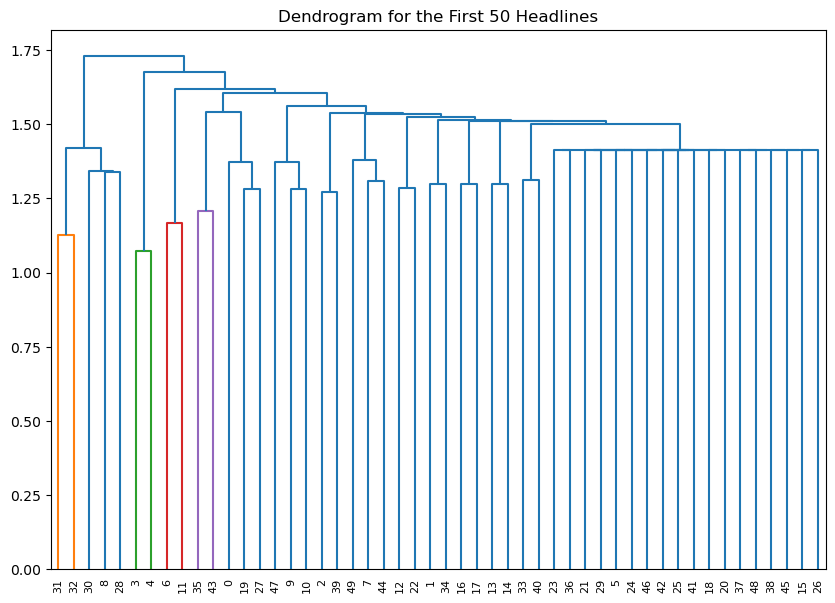

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using the first 50 preprocessed headlines
first_50_headlines = headlines[:50]  

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(first_50_headlines)

# We then perform Agglomerative Clustering (without fitting, we need the linkage matrix for dendrogram)
# Use 'ward' linkage for hierarchical clustering
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for the First 50 Headlines")
dendrogram(linkage_matrix)
plt.show()

### Q1.4. Using Latent Dirichlett Allocation algorithm, perform topic modeling to find 20 topics from the headlines. Then, print the top 10 words for each topic.

In [21]:
# Vectorizing the text using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
TDM = vectorizer.fit_transform(headlines)

# Then performing LDA to find 20 topics
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(TDM)

LatentDirichletAllocation(n_components=20, random_state=42)

In [22]:
# Getting the words in the vocabulary
word_list = vectorizer.get_feature_names_out()

In [23]:
# Printing the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    top_words = [word_list[i] for i in topic.argsort()[-10:]]  # Get top 10 words for the topic
    print(f"Topic {i + 1}: {', '.join(top_words)}")

Topic 1: highway, plane, airport, test, get, care, farm, drug, first, crash
Topic 2: flu, pakistan, attacks, kills, dead, iraq, attack, killed, us, interview
Topic 3: sydney, qld, gold, west, country, search, north, missing, south, coast
Topic 4: education, korea, fears, rain, ban, union, concerns, farmers, business, talks
Topic 5: government, opposition, campaign, funds, fight, flood, budget, boost, funding, govt
Topic 6: street, tigers, three, black, win, afl, lead, one, day, back
Topic 7: rate, price, warning, prices, victoria, covid, go, queensland, rise, coronavirus
Topic 8: sale, port, mayor, green, job, mp, plans, hospital, minister, council
Topic 9: study, new, jail, rail, urged, support, public, road, help, plan
Topic 10: goes, legal, threat, park, action, news, end, national, rural, report
Topic 11: grandstand, changes, new, png, laws, strike, run, review, hit, may
Topic 12: hopes, share, australian, new, future, high, year, market, open, school
Topic 13: asylum, party, elect

### Q1.5. Using Non-Negative Matrix Factorization algorithm, perform topic modeling to find 20 topics from the headlines. Then, print the top 10 words for each topic

In [50]:
from sklearn.decomposition import NMF
# Converting the headlines to a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(headlines)

# Applying Non-Negative Matrix Factorization (NMF) to find 20 topics
nmf_model = NMF(n_components=20, random_state=42)
nmf_topic_matrix = nmf_model.fit_transform(tfidf_matrix)

# Getting the words in the vocabulary
word_list = vectorizer.get_feature_names_out()

# Printing the top 10 words for each topic
for i, topic in enumerate(nmf_model.components_):
    top_words = [word_list[i] for i in topic.argsort()[-10:]]  # Get top 10 words for the topic
    print(f"Topic {i + 1}: {', '.join(top_words)}")

C:\Users\JEGEDETB\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 1: assault, arrest, seek, shooting, officer, hunt, death, probe, investigate, police
Topic 2: act, funds, local, funding, sa, wa, qld, vic, urged, govt
Topic 3: power, may, sa, residents, murray, back, restrictions, farmers, plan, water
Topic 4: qld, tuesday, friday, reporter, sa, closer, exchange, national, news, rural
Topic 5: scott, ben, james, smith, david, john, nrl, michael, extended, interview
Topic 6: coronavirus, centre, home, records, york, year, cases, laws, zealand, new
Topic 7: october, sa, may, drum, august, vic, tas, wa, hour, country
Topic 8: stories, top, analysis, entertainment, market, news, sport, business, weather, abc
Topic 9: plane, woman, driver, road, two, dies, fatal, killed, car, crash
Topic 10: vs, first, coronavirus, south, one, test, cup, world, day, australia
Topic 11: case, high, told, front, faces, charges, murder, face, accused, court
Topic 12: destroys, suspicious, home, threat, school, blaze, sydney, crews, house, fire
Topic 13: troops, trump, 

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

### 1. A reflection of your experience performing the activity.
Working through this lab provided me with practical experience with key NLP techniques such as preprocessing which I've been doing since the first module, clustering, and topic modeling. Applying ESA to find related documents, in our case it was documents that had price, sugar and sweet and we could also see their similarities, and then using Agglomerative Clustering to visualize document relationships through dendrograms deepened my understanding of document similarity. Using LDA and NMF for topic modeling revealed hidden themes in the headlines, i saw how different the outputs were between LDA and NMF, which shows me how these algorithms can distill large text datasets into interpretable insights.

### 2. A reflection on the importance of learning this activity.
Learning these techniques is critical for us, because handling unstructured text data is abundant in real-world applications like customer feedback analysis, content categorization, and search optimization. The ability to preprocess, cluster, and extract topics from text helps build more intelligent systems, such as recommendation engines and information retrieval systems.